In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sn
#from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_df = pd.read_csv("diabetes.csv", index_col=[0] )
diabetes_df.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                                                         
6                148             72             35        0  33.6   
1                 85             66             29        0  26.6   
8                183             64              0        0  23.3   
1                 89             66             23       94  28.1   
0                137             40             35      168  43.1   

             DiabetesPedigreeFunction  Age  Outcome  
Pregnancies                                          
6                               0.627   50        1  
1                               0.351   31        0  
8                               0.672   32        1  
1                               0.167   21        0  
0                               2.288   33        1

In [3]:
X_features = list( diabetes_df.columns )
X_features.remove( "Outcome" )

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, \
y_train, y_test = train_test_split( diabetes_df[X_features],
                                    diabetes_df.Outcome,
                                    test_size = 0.3,
                                    random_state = 100 )

In [5]:
X_train.shape, X_test.shape

((537, 7), (231, 7))

In [6]:
X_test

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                                                         
1                 79             60             42       48  43.5   
0                 86             68             32        0  35.8   
5                162            104              0        0  37.7   
8                 65             72             23        0  32.0   
9                123             70             44       94  33.1   
...              ...            ...            ...      ...   ...   
11               155             76             28      150  33.3   
9                 91             68              0        0  24.2   
8                155             62             26      495  34.0   
1                164             82             43       67  32.8   
2                 56             56             28       45  24.2   

             DiabetesPedigreeFunction  Age  
Pregnancies                                 
1                               0.678   23  
0                               0.238   25  
5                               0.151   52  
8                               0.600   42  
9                               0.374   40  
...                               ...  ...  
11                              1.353   51  
9                               0.200   58  
8                               0.543   46  
1                               0.341   50  
2                               0.332   22  

[231 rows x 7 columns]

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier( n_estimators = 100,
                                 max_features = 0.2,
                                 max_depth = 10,
                                 max_samples = 0.5)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)

In [8]:
y_pred_prob = rf_clf.predict_proba( X_test )[:,1]
y_pred = rf_clf.predict( X_test )

In [9]:
!pip install -q eli5

    torch (>=1.7.*)
           ~~~~~~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Partial Dependence Plots (PDPs)


In [10]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

### Effect of Insulin on Diabetes


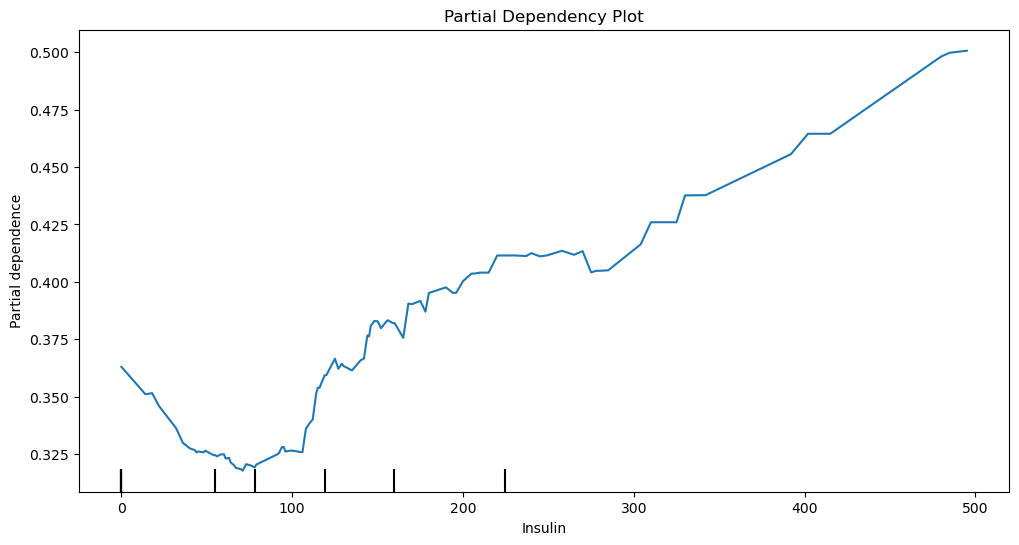

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_test,
    features=['Insulin'],
    feature_names=X_features,
    ax=ax
)

### Effect of Glucose on Diabetes


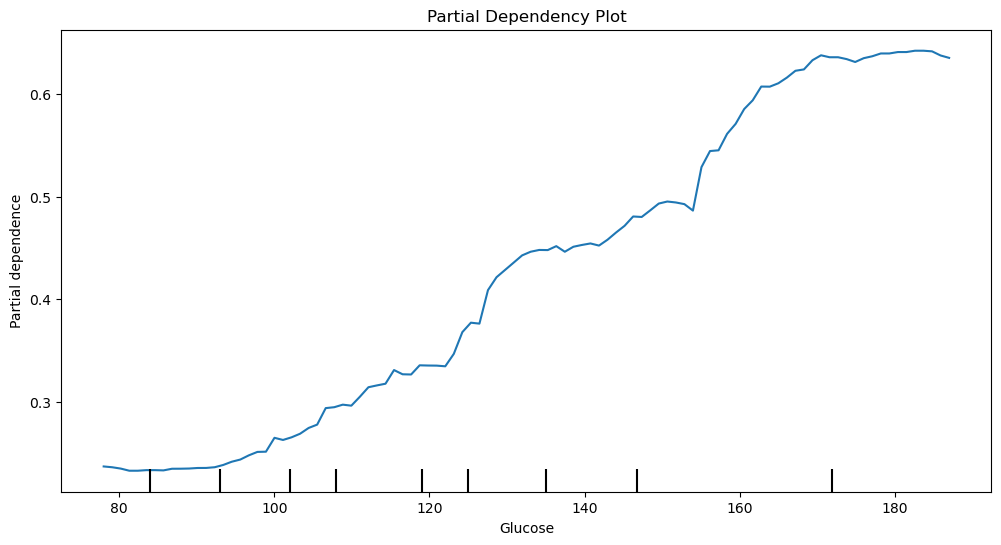

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_test,
    features=['Glucose'],
    feature_names=X_features,
    ax=ax
)

## LIME – Local Interpretation of Model Explanation


In [13]:
#!pip install -q lime

In [14]:
import lime
import lime.lime_tabular

In [15]:
explainer = (lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.to_numpy(),
    training_labels=y_train,
    feature_names=X_features,
    class_names=['Non-diabetes','Diabetes'],
    kernel_width=3,
    verbose = True ))

### Explaining a case of Non-Diabetes


In [16]:
X_test.iloc[0]

Glucose                     79.000
BloodPressure               60.000
SkinThickness               42.000
Insulin                     48.000
BMI                         43.500
DiabetesPedigreeFunction     0.678
Age                         23.000
Name: 1, dtype: float64

In [17]:
exp = explainer.explain_instance(X_test.iloc[0].to_numpy(), rf_clf.predict_proba)

Intercept 0.38692540587916335
Prediction_local [0.35193908]
Right: 0.1825


In [18]:
exp.show_in_notebook(show_table=True, show_all=False)

### Explaining a case of Diabetes


In [19]:
exp = explainer.explain_instance( X_test.iloc[4].to_numpy(), 
                                  rf_clf.predict_proba )

Intercept 0.3363935625941096
Prediction_local [0.46924075]
Right: 0.4789990842490843


In [20]:
exp.show_in_notebook(show_table=True, show_all=False)

## Using Shapley Values


In [21]:
#!pip install -q shap

### Explaining a case of Non-diabetes

In [22]:
import shap

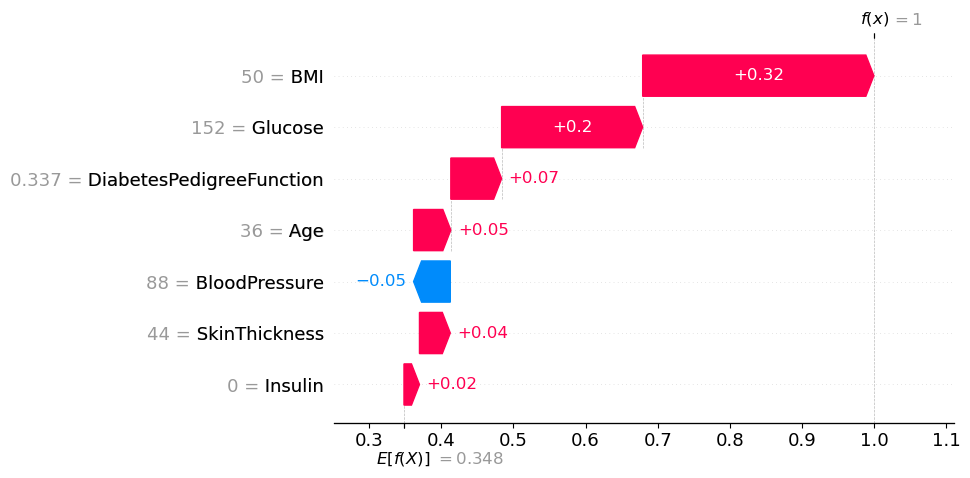

In [77]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [78]:
shap.plots.force(shap_values[0])

In [79]:
shap.plots.force(shap_values[:500])


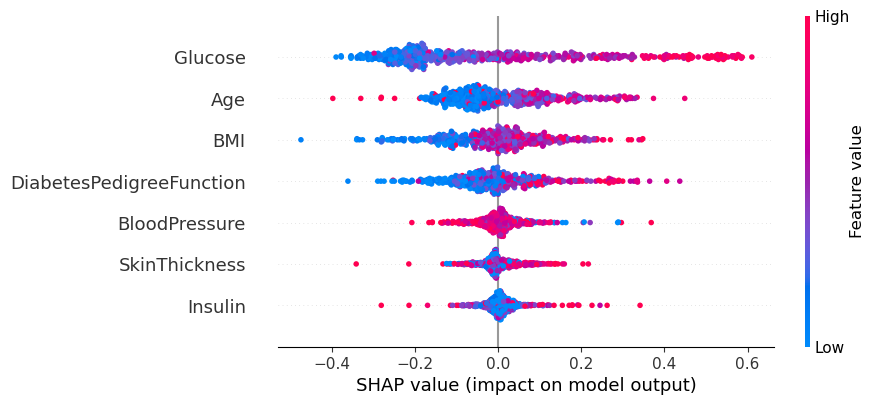

In [ ]:
shap.plots.beeswarm(shap_values)

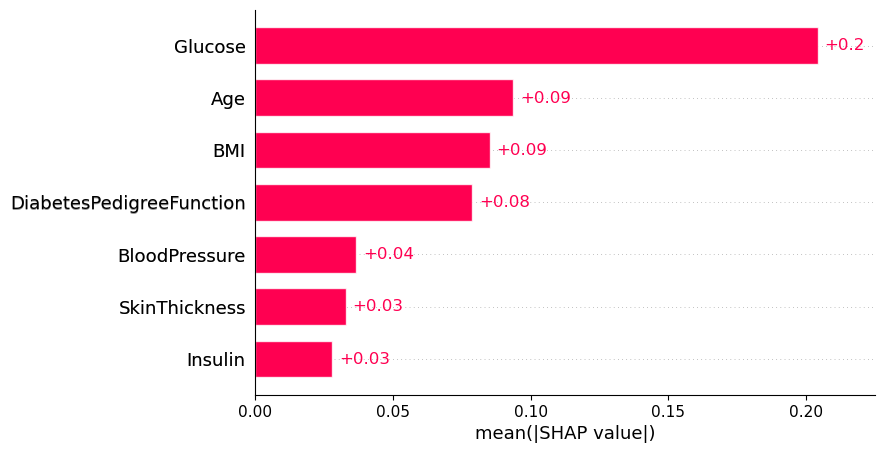

In [82]:
shap.plots.bar(shap_values)


In [83]:
"""import transformers
import shap

# load a transformers pipeline model
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model)
shap_values = explainer(["What a great movie! ...if you have no taste."])

# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])"""

'import transformers\nimport shap\n\n# load a transformers pipeline model\nmodel = transformers.pipeline(\'sentiment-analysis\', return_all_scores=True)\n\n# explain the model on two sample inputs\nexplainer = shap.Explainer(model)\nshap_values = explainer(["What a great movie! ...if you have no taste."])\n\n# visualize the first prediction\'s explanation for the POSITIVE output class\nshap.plots.text(shap_values[0, :, "POSITIVE"])'

In [84]:
"""import transformers
import shap

# load a transformers pipeline model
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model)
shap_values = explainer(["What a great movie! ...if you have no taste."])

# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])"""

'import transformers\nimport shap\n\n# load a transformers pipeline model\nmodel = transformers.pipeline(\'sentiment-analysis\', return_all_scores=True)\n\n# explain the model on two sample inputs\nexplainer = shap.Explainer(model)\nshap_values = explainer(["What a great movie! ...if you have no taste."])\n\n# visualize the first prediction\'s explanation for the POSITIVE output class\nshap.plots.text(shap_values[0, :, "POSITIVE"])'

## Individual Conditional Expectations (ICE)


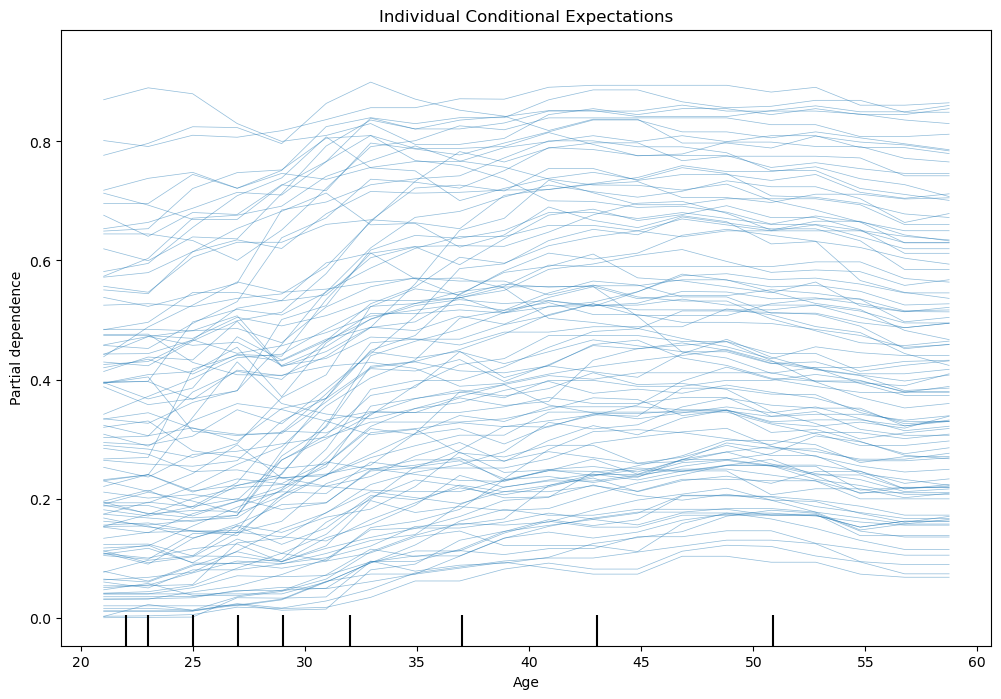

In [86]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")
display = PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train,
    features=["Age"],
    kind="individual",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    ax = ax
)


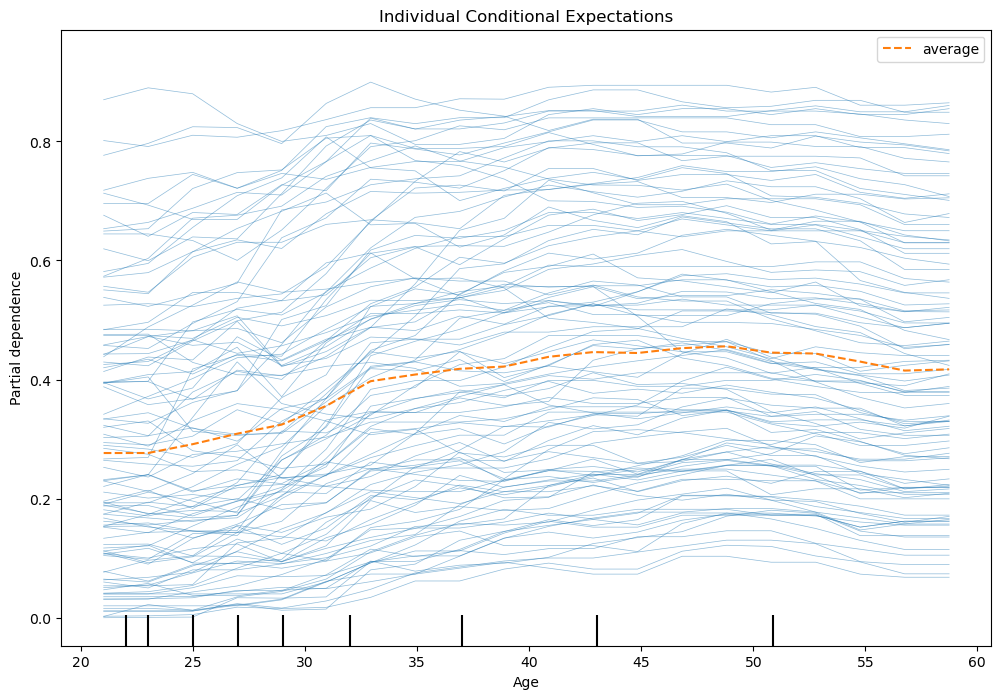

In [87]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train,
    features=["Age"],
    kind="both",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax = ax
)